In [1]:
import os
import pandas as pd
import numpy as np

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Activation, Reshape, Concatenate
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

def my_model(X_train,Y_train,x_1,x_2,x_3,x_4,x_5,y_1):
    input_month = keras.Input(shape=(x_1,),name="input_month")
    input_day    = keras.Input(shape=(x_2,),name="input_day")    
    input_dow    = keras.Input(shape=(x_3,),name="input_dow")
    input_time   = keras.Input(shape=(x_4,),name="input_time")    
    input_crime  = keras.Input(shape=(x_5,),name="input_crime")

    # DNN 
    output_model = layers.Concatenate()([input_month, input_day, input_dow, input_time, input_crime])    
    
    output_model = layers.Dense(16, activation='relu',name="hidden1")(output_model)
    #output_model = layers.Dense(50, activation='relu',name="hidden2")(output_model)
    output_model = layers.Dense(y_1, activation='softmax',name="output_layer")(output_model)

    model = keras.Model(inputs=[input_month, input_day, input_dow, input_time, input_crime],
                        outputs=output_model)

    model.compile(optimizer="adam",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # starts training
    hist=model.fit(X_train,Y_train,
                   batch_size=100,
                   validation_split=0.3,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
                   epochs=100,
                   verbose=1,
                   shuffle=True)
    
    return hist,model


def model_summary(model):
    model.summary()
    
def grapviz(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    return plt.show()


In [3]:
# onehot coding후 dnn
folder="preprossed"
subdir_names=os.listdir(folder)

histL=[]
modelL=[]
for file_name in subdir_names:
    if file_name=="BRONXW.csv":
        continue
    input_X=[]
    y=[]
    csv=pd.read_csv(folder+"\\"+file_name) 
        
    input_X.append(np.array(pd.get_dummies(csv.month)))
    input_X.append(np.array(pd.get_dummies(csv.day)))
    input_X.append(np.array(pd.get_dummies(csv.dow)))
    input_X.append(np.array(pd.get_dummies(csv.time)))
    input_X.append(np.array(pd.get_dummies(csv.crime_code)))
    y=np.array(pd.get_dummies(csv.street))

    hist,model=my_model(input_X,y,12,31,7,24,7,y[0].size)
    histL.append(hist)
    modelL.append(model)

Train on 70189 samples, validate on 30081 samples
Epoch 1/100
70189/70189 [==============================] - 2s 30us/sample - loss: 1.2123 - accuracy: 0.4439 - val_loss: 1.2008 - val_accuracy: 0.4485
Epoch 2/100
70189/70189 [==============================] - 1s 21us/sample - loss: 1.1954 - accuracy: 0.4545 - val_loss: 1.1988 - val_accuracy: 0.4455
Epoch 3/100
70189/70189 [==============================] - 1s 17us/sample - loss: 1.1935 - accuracy: 0.4549 - val_loss: 1.1994 - val_accuracy: 0.4393
Epoch 4/100
70189/70189 [==============================] - 1s 17us/sample - loss: 1.1924 - accuracy: 0.4550 - val_loss: 1.2009 - val_accuracy: 0.4373
Epoch 5/100
70189/70189 [==============================] - 1s 17us/sample - loss: 1.1916 - accuracy: 0.4553 - val_loss: 1.2014 - val_accuracy: 0.4393
Epoch 6/100
70189/70189 [==============================] - 1s 16us/sample - loss: 1.1909 - accuracy: 0.4554 - val_loss: 1.2023 - val_accuracy: 0.4398
Epoch 7/100
70189/70189 [=========================

In [4]:
# BRONXW

def my_model_BRONXW(X_train,Y_train,x_1,x_2,x_3,x_4,x_5,y_1):
    input_month = keras.Input(shape=(x_1,),name="input_month")
    input_day    = keras.Input(shape=(x_2,),name="input_day")    
    input_dow    = keras.Input(shape=(x_3,),name="input_dow")
    input_time   = keras.Input(shape=(x_4,),name="input_time")    
    input_crime  = keras.Input(shape=(x_5,),name="input_crime")

    # DNN 
    output_model = layers.Concatenate()([input_month, input_day, input_dow, input_time, input_crime])    
    
    output_model = layers.Dense(16, activation='relu',name="hidden1")(output_model)
    #output_model = layers.Dense(50, activation='relu',name="hidden2")(output_model)
    output_model = layers.Dense(y_1, activation='sigmoid',name="output_layer")(output_model)

    model = keras.Model(inputs=[input_month, input_day, input_dow, input_time, input_crime],
                        outputs=output_model)

    model.compile(optimizer="adam",
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # starts training
    hist=model.fit(X_train,Y_train,
                   batch_size=100,
                   validation_split=0.3,
                   epochs=100,
                   verbose=1,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
                   shuffle=True)
    
    return hist,model


# onehot coding후 dnn
folder="preprossed"
file_name="BRONXW.csv"
input_X=[]
y=[]
csv=pd.read_csv(folder+"\\"+file_name) 

input_X.append(np.array(pd.get_dummies(csv.month)))
input_X.append(np.array(pd.get_dummies(csv.day)))
input_X.append(np.array(pd.get_dummies(csv.dow)))
input_X.append(np.array(pd.get_dummies(csv.time)))
input_X.append(np.array(pd.get_dummies(csv.crime_code)))
for i in range(len(csv)):
    if csv["street"][i]==4:
        y.append([0])
    else:
        y.append([1])

y=np.array(y)
hist,model=my_model_BRONXW(input_X,y,12,31,7,24,7,1)
histL.append(hist)
modelL.append(model)

Train on 53130 samples, validate on 22770 samples
Epoch 1/100
53130/53130 [==============================] - 2s 29us/sample - loss: 0.4211 - accuracy: 0.8511 - val_loss: 0.4004 - val_accuracy: 0.8650
Epoch 2/100
53130/53130 [==============================] - 1s 18us/sample - loss: 0.3892 - accuracy: 0.8675 - val_loss: 0.3974 - val_accuracy: 0.8650
Epoch 3/100
53130/53130 [==============================] - 1s 19us/sample - loss: 0.3886 - accuracy: 0.8675 - val_loss: 0.3959 - val_accuracy: 0.8650
Epoch 4/100
53130/53130 [==============================] - 1s 19us/sample - loss: 0.3883 - accuracy: 0.8675 - val_loss: 0.3955 - val_accuracy: 0.8650
Epoch 5/100
53130/53130 [==============================] - 1s 18us/sample - loss: 0.3880 - accuracy: 0.8675 - val_loss: 0.3954 - val_accuracy: 0.8650
Epoch 6/100
53130/53130 [==============================] - 1s 20us/sample - loss: 0.3877 - accuracy: 0.8675 - val_loss: 0.3962 - val_accuracy: 0.8650
Epoch 7/100
53130/53130 [=========================

Model: "BROOKLYN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_month (InputLayer)        [(None, 12)]         0                                            
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_dow (InputLayer)          [(None, 7)]          0                                            
__________________________________________________________________________________________________
input_time (InputLayer)         [(None, 24)]         0                                            
___________________________________________________________________________________________

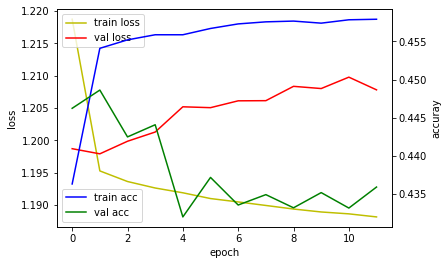

Model: "MANHATTAN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_month (InputLayer)        [(None, 12)]         0                                            
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_dow (InputLayer)          [(None, 7)]          0                                            
__________________________________________________________________________________________________
input_time (InputLayer)         [(None, 24)]         0                                            
__________________________________________________________________________________________

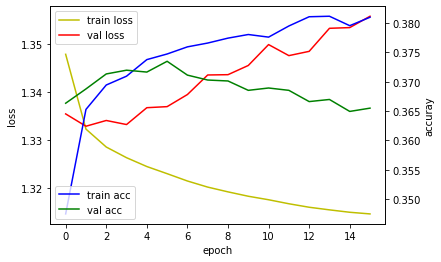

Model: "QUEENS"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_month (InputLayer)        [(None, 12)]         0                                            
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_dow (InputLayer)          [(None, 7)]          0                                            
__________________________________________________________________________________________________
input_time (InputLayer)         [(None, 24)]         0                                            
_____________________________________________________________________________________________

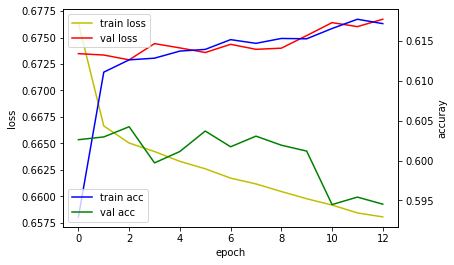

Model: "BRONX"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_month (InputLayer)        [(None, 12)]         0                                            
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_dow (InputLayer)          [(None, 7)]          0                                            
__________________________________________________________________________________________________
input_time (InputLayer)         [(None, 24)]         0                                            
______________________________________________________________________________________________

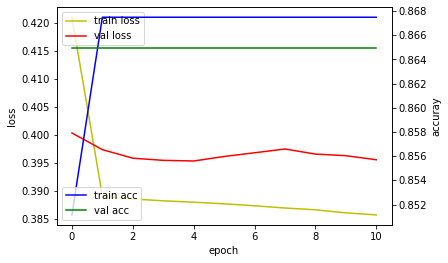

In [5]:
modelName=["BROOKLYN","MANHATTAN","QUEENS","BRONX"]
for i in range(4):
    modelL[i]._name=modelName[i]
    model_summary(modelL[i])
    grapviz(histL[i])